OBJECTIVE
The objective of this project is to develop a machinelearning model and deploy it as a user-friendly web application that predicts the resale prices of flats in Singapore. This predictive model will be based on historical data of resale flat transactions, and it aims to assist both potential buyers and sellers in estimating the resalevalue of a flat.

In [1]:
#Cleaning the data and training the model

In [2]:
# Importing the requried libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the csv data as dataframes
df1=pd.read_csv(r"C:\Users\91701\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\91701\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\91701\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4=pd.read_csv(r"C:\Users\91701\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df5=pd.read_csv(r"C:\Users\91701\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [5]:
#identify the shape

In [4]:
dfs=[df1,df2,df3,df4,df5]
for i in dfs:
    print(i.shape)

(287196, 10)
(369651, 10)
(37153, 11)
(52203, 10)
(174038, 11)


In [6]:
#concating all the date 
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [7]:
#Understanding the data and cleaning

In [8]:
# Displaying the data
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [9]:
# Displaying the data
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
920236,2024-03,YISHUN,4 ROOM,513D,YISHUN ST 51,13 TO 15,93.0,Model A,2018,570000.0,93 years 01 month
920237,2024-03,YISHUN,4 ROOM,841,YISHUN ST 81,01 TO 03,104.0,Model A,1988,575000.0,62 years 11 months
920238,2024-03,YISHUN,5 ROOM,428A,YISHUN AVE 11,04 TO 06,112.0,Improved,2015,663000.0,90 years 01 month
920239,2024-03,YISHUN,5 ROOM,637,YISHUN ST 61,10 TO 12,121.0,Improved,1987,680000.0,62 years 08 months
920240,2024-03,YISHUN,EXECUTIVE,791,YISHUN AVE 2,10 TO 12,146.0,Apartment,1987,851888.0,62 years 07 months


In [11]:
# Shape of the data
df.shape

(920241, 11)

In [15]:
#information on datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920241 entries, 0 to 920240
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                920241 non-null  object 
 1   town                 920241 non-null  object 
 2   flat_type            920241 non-null  object 
 3   block                920241 non-null  object 
 4   street_name          920241 non-null  object 
 5   storey_range         920241 non-null  object 
 6   floor_area_sqm       920241 non-null  float64
 7   flat_model           920241 non-null  object 
 8   lease_commence_date  920241 non-null  int64  
 9   resale_price         920241 non-null  float64
 10  remaining_lease      211191 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.2+ MB


In [16]:
#unique values in data

for col in df.columns[0:]:
    print(col, ":" , (df[col].nunique()), "labels")

month : 411 labels
town : 27 labels
flat_type : 8 labels
block : 2706 labels
street_name : 584 labels
storey_range : 25 labels
floor_area_sqm : 211 labels
flat_model : 34 labels
lease_commence_date : 56 labels
resale_price : 9415 labels
remaining_lease : 722 labels


In [17]:
# Null values
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [18]:
#Droping the 'remaining_lease' column as majority of the rows lacks this value(data is available only from 2015)

In [24]:
# Droping the column as mojority of the data is null
#removed   df=df.drop(columns="remaining_lease")

In [25]:
# After droping the column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

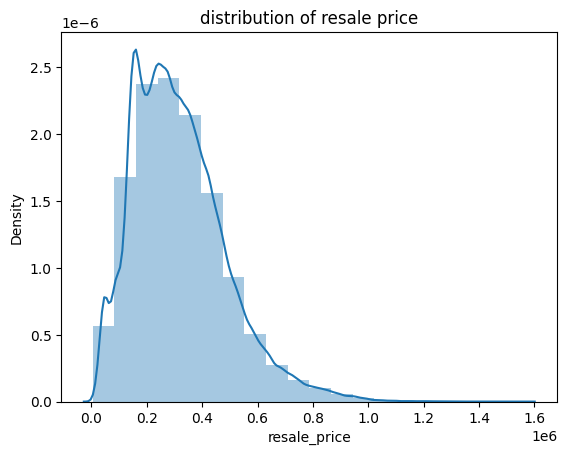

In [27]:
# Visualize the distribution of the resale price column
sns.distplot(df["resale_price"],bins=20)
plt.title("distribution of resale price")
plt.show()

In [28]:
#Dealing with Features

In [29]:
#flat_type column
#Collapsing flat type categories


In [30]:
df["flat_type"].value_counts()

flat_type
4 ROOM              349415
3 ROOM              294261
5 ROOM              193854
EXECUTIVE            69235
2 ROOM               11634
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       263
Name: count, dtype: int64

In [31]:
# Unique lables in flat_type column
df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [33]:
mapping={"MULTI-GENERATION" : "MULTI GENERATION"}
df["flat_type"] = df["flat_type"].replace(mapping)
df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

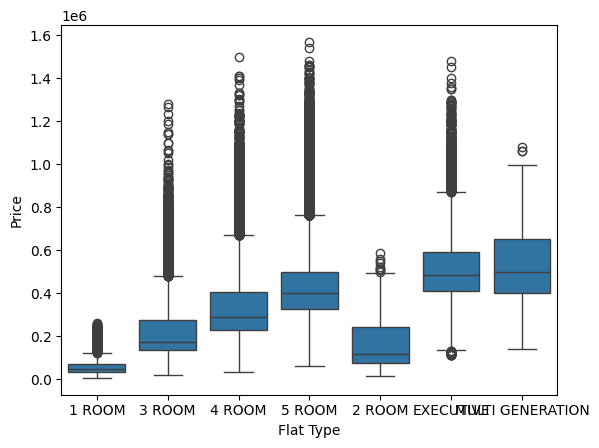

In [35]:
# Visualize relationship between price and flat_type
sns.boxplot(x = df['flat_type'], y = df['resale_price'])
plt.xlabel('Flat Type')
plt.ylabel('Price')
plt.show()

In [36]:
#Encoding the flat type categories

In [39]:
# Assigning the value-pairs to be replaced

cat = {"1 ROOM" : 1,
       "3 ROOM": 3,
       "4 ROOM" : 4,
       "5 ROOM" : 5,
       "2 ROOM" : 2,
       "EXECUTIVE" : 6,
       "MULTI GENERATION" :7}
df["flat_type"] = df["flat_type"].replace(cat)
df["flat_type"].value_counts()

flat_type
4    349415
3    294261
5    193854
6     69235
2     11634
1      1300
7       542
Name: count, dtype: int64

In [40]:
#Dealing with collapsed flat model categories

In [41]:
# Flat_model column
print(df['flat_model'].nunique())
df['flat_model'].unique()

34


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'Type S1', 'Type S2',
       'DBSS', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [44]:
# Deal with capitalized value
df["flat_model"] = df["flat_model"].str.lower()
df["flat_model"].unique()

array(['improved', 'new generation', 'model a', 'standard', 'simplified',
       'model a-maisonette', 'apartment', 'maisonette', 'terrace',
       '2-room', 'improved-maisonette', 'multi generation',
       'premium apartment', 'adjoined flat', 'premium maisonette',
       'model a2', 'type s1', 'type s2', 'dbss', 'premium apartment loft',
       '3gen'], dtype=object)

In [45]:
# Number of unique lables in flat model after dealing with capitalized values
df["flat_model"].value_counts()

flat_model
model a                   262403
improved                  240163
new generation            188187
simplified                 57302
premium apartment          46102
standard                   42376
apartment                  35260
maisonette                 29502
model a2                   10065
dbss                        3238
model a-maisonette          2065
adjoined flat               1238
terrace                      690
multi generation             542
type s1                      431
type s2                      214
improved-maisonette          125
2-room                       118
premium apartment loft       107
premium maisonette            86
3gen                          27
Name: count, dtype: int64

In [49]:
# Encoding flat_model column
le = preprocessing.LabelEncoder()

flat_modelcode = le.fit_transform(df["flat_model"])
df.insert(loc = 8,
          column = "flat_modelcode",
          value = flat_modelcode)


In [50]:
df["flat_modelcode"].value_counts()

flat_modelcode
8     262403
5     240163
12    188187
16     57302
13     46102
17     42376
3      35260
7      29502
10     10065
4       3238
9       2065
2       1238
18       690
11       542
19       431
20       214
6        125
0        118
14       107
15        86
1         27
Name: count, dtype: int64

In [51]:
#Other features preparation

In [52]:
# Town column 
df['town'].nunique()

27

In [53]:
df['town'].value_counts()

town
TAMPINES           79459
YISHUN             69609
BEDOK              66305
JURONG WEST        66191
WOODLANDS          65050
ANG MO KIO         51833
HOUGANG            50369
BUKIT BATOK        43977
CHOA CHU KANG      37979
BUKIT MERAH        34091
PASIR RIS          33056
SENGKANG           32000
TOA PAYOH          31355
QUEENSTOWN         28606
GEYLANG            28029
CLEMENTI           27899
BUKIT PANJANG      27484
KALLANG/WHAMPOA    26957
JURONG EAST        24633
SERANGOON          22714
BISHAN             21174
PUNGGOL            20173
SEMBAWANG          13629
MARINE PARADE       8005
CENTRAL AREA        7097
BUKIT TIMAH         2503
LIM CHU KANG          64
Name: count, dtype: int64

In [54]:
# Creating a column with encoded value
town_code = le.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town_code)

In [55]:
# Encoded value count
df['town_code'].value_counts()

town_code
23    79459
26    69609
1     66305
13    66191
25    65050
0     51833
11    50369
3     43977
8     37979
4     34091
17    33056
21    32000
24    31355
19    28606
10    28029
9     27899
5     27484
14    26957
12    24633
22    22714
2     21174
18    20173
20    13629
16     8005
7      7097
6      2503
15       64
Name: count, dtype: int64

In [56]:
#Dividing the columns

In [57]:
# print header of colums
df["storey_range"].head()

0    10 TO 12
1    04 TO 06
2    10 TO 12
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object

In [58]:
# Splitting storey range column
storey = df["storey_range"].str.split(" TO ",expand =True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [59]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [60]:
# Splitting month column
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [61]:
# Creating the year values as column
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])
# Creating the storey maximum values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [62]:
df.head()

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0


In [65]:
df.to_csv('C:\Users\91701\Documents\DS\Study material\Python\Pricedata.csv', index=False)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (642408180.py, line 1)

In [66]:
#Dealing with datatypes

In [67]:
# Datatyppe of the columns
df.dtypes

month                   object
selling_year            object
selling_month           object
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

In [68]:
# Changing the datatype of numeric columns
df[['selling_year','selling_month','storey_min','storey_max']] = df[['selling_year','selling_month','storey_min','storey_max']].astype('int')

In [69]:
df.dtypes

month                   object
selling_year             int32
selling_month            int32
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min               int32
storey_max               int32
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

<Axes: >

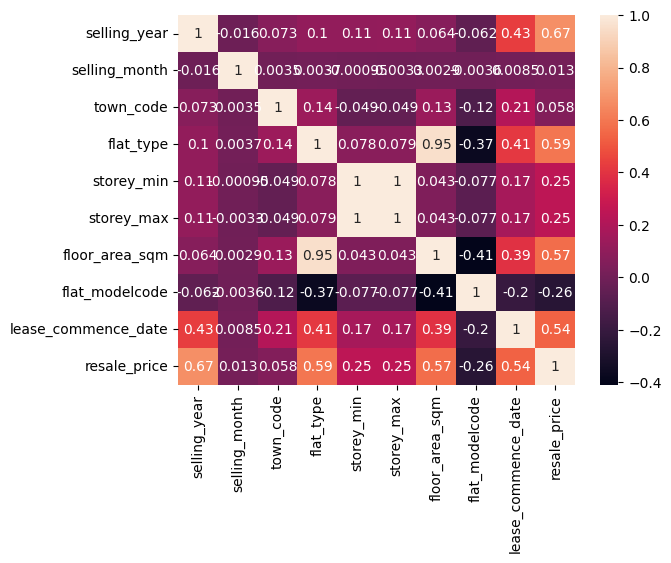

In [70]:
# Correlation for the feature
corr_df = df[['selling_year','selling_month','town_code','flat_type','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date','resale_price']].dropna().corr()
sns.heatmap(corr_df, annot = True)

In [71]:
#Training the model

In [72]:
# Assigning the data
X = df[['selling_year','selling_month','town_code','flat_type','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date']]
y = df['resale_price']

In [74]:
X

,selling_year,selling_month,town_code,flat_type,storey_min,storey_max,floor_area_sqm,flat_modelcode,lease_commence_date
0,1990,1,0,1,10,12,31.0,5,1977
1,1990,1,0,1,4,6,31.0,5,1977
2,1990,1,0,1,10,12,31.0,5,1977
3,1990,1,0,1,7,9,31.0,5,1977
4,1990,1,0,3,4,6,73.0,12,1976
...,...,...,...,...,...,...,...,...,...
920236,2024,3,26,4,13,15,93.0,8,2018
920237,2024,3,26,4,1,3,104.0,8,1988
920238,2024,3,26,5,4,6,112.0,5,2015
920239,2024,3,26,5,10,12,121.0,5,1987


In [75]:
# Splitting the data
# Importing the split
from sklearn.model_selection import train_test_split

# Objecting the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [76]:
#Linear Regression

In [78]:
# Create a regressor
from sklearn.linear_model import LinearRegression

# Create a regressor object
lin_reg = LinearRegression()

# fit the model with X-train and y_train data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [79]:
# Accuracy score of the model
score = lin_reg.score(X_test,y_test)
print(score * 100,"%")

76.16844732580252 %


In [80]:
#Decision Tree Regressor

In [81]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
Dt_reg = DecisionTreeRegressor(random_state = 0)  
  
# fit the model with X-train and y_train data 
Dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [83]:
# Accuracy of the model
score = Dt_reg.score(X_test,y_test)
print(score * 100,"%")

96.02013472446598 %


In [84]:
#Random Forest Regressor

In [85]:
# Create a regressor
from sklearn.ensemble import RandomForestRegressor

# Create a regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model with X-train and y_train data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [86]:
#Pickling the random forest trained knowledge to build streamlit ML model web page

In [87]:
# Pickling the trained model
# Importing the pickle package
import pickle

with open("resale_rfr.pkl","wb") as files:
  pickle.dump(rf_reg, files)

In [88]:
with open('resale_rfr.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [89]:
sample_data = ([[2019,12,0,1,10,12,115,5,2000]])
prediction = loaded_model.predict(sample_data)

# Display the prediction
print("Prediction:", prediction)

Prediction: [585930.]


In [90]:
sample_data1 = ([[2019,1,1,2,10,12,'115.0',2,2000]])
predict = rf_reg.predict(sample_data1)

# Display the prediction
print("Prediction:", predict)

Prediction: [553810.]


In [91]:
sample_data1 = ([[2024,1,26,6,4,6,146.0,5,1988]])
dtpredict = Dt_reg.predict(sample_data1)

# Display the prediction
print("Prediction:", dtpredict)

Prediction: [795000.]
